# ‰ΩøÁî® diffusers ËÆ≠ÁªÉÊ®°Âûã

In [ ]:
# !pip install ipywidgets

In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image
import torchvision


def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im


# Mac users may need device = 'mps' (untested)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [1]:
# from huggingface_hub import snapshot_download
# import os
# os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

# snapshot_download(repo_id="sd-dreambooth-library/mr-potato-head", local_dir="./model", local_dir_use_symlinks=False)

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

'G:\\code\\ai\\stable-diffusion-webui_tobe\\notebook\\model'

In [2]:
from diffusers import StableDiffusionPipeline

# https://huggingface.co/sd-dreambooth-libraryÔºåËøôÈáåÊúâÊù•Ëá™Á§æÂå∫ÁöÑÂêÑÁßçÊ®°Âûã
# model_id = "sd-dreambooth-library/mr-potato-head"
model_id = "G:\code\pretrain_model_dir\mr-potato-head"

# Âä†ËΩΩÁÆ°Á∫ø
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16). to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

g:\code\ai\stable-diffusion-webui_tobe\venv\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


  0%|          | 0/50 [00:00<?, ?it/s]

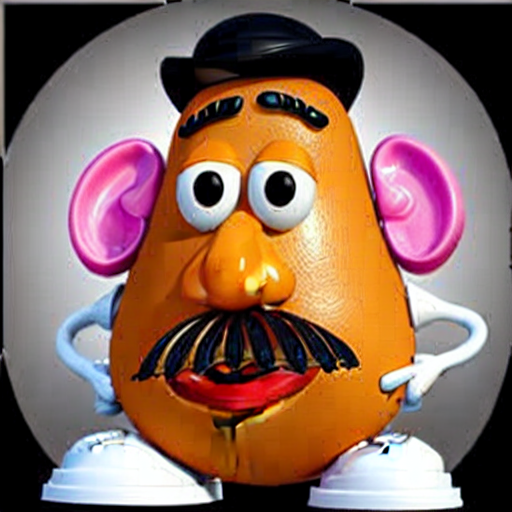

In [11]:
# Âú®Ëøô‰∏™Á§∫‰æã‰∏≠ÔºåsksÊòØÊñ∞ÂºïÂÖ•ÁöÑÂîØ‰∏ÄÊ†áËØÜÁ¨¶(Unique IDentif ierÔºåUID)
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

In [14]:
# from huggingface_hub import snapshot_download
# import os
# os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

# snapshot_download(repo_id="johnowhitaker/ddpm-butterflies-32px", local_dir="./model", local_dir_use_symlinks=False)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

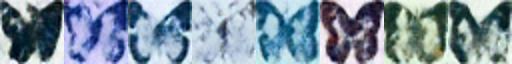

In [13]:
from diffusers import DDPMPipeline

# Âä†ËΩΩÈ¢ÑËÆæÂ•ΩÁöÑÁÆ°Á∫ø
# model_id = "johnowhitaker/ddpm-butterflies-32px"
model_id = r"G:\code\pretrain_model_dir\ddpm-butterflies-32px"
butterfly_pipeline = DDPMPipeline.from_pretrained(model_id).to(device)

# ÁîüÊàê8Âº†ÂõæÁâá
images = butterfly_pipeline(batch_size=8).images

# ËæìÂá∫ÂõæÁâá
make_grid(images)

# ÂáÜÂ§áÊï∞ÊçÆ

In [15]:
import torchvision
from datasets import load_dataset
from torchvision import transforms

dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train", cache_dir="./data/smithsonian_butterflies_subset")

# ‰πüÂèØ‰ª•‰ªéÊú¨Âú∞Êñá‰ª∂Â§π‰∏≠Âä†ËΩΩÂõæÂÉè
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")

# Êàë‰ª¨Â∞ÜÂú®32√ó32ÂÉèÁ¥†ÁöÑÊ≠£ÊñπÂΩ¢ÂõæÂÉè‰∏äËøõË°åËÆ≠ÁªÉÔºå‰ΩÜ‰Ω†‰πüÂèØ‰ª•Â∞ùËØïÊõ¥Â§ßÂ∞∫ÂØ∏ÁöÑÂõæÂÉè
image_size = 32
# Â¶ÇÊûúGPUÂÜÖÂ≠ò‰∏çË∂≥Ôºå‰Ω†ÂèØ‰ª•ÂáèÂ∞èbatch_size
batch_size = 64

# ÂÆö‰πâÊï∞ÊçÆÂ¢ûÂº∫ËøáÁ®ã
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Ë∞ÉÊï¥Â§ßÂ∞è
        transforms.RandomHorizontalFlip(),            # ÈöèÊú∫ÁøªËΩ¨
        transforms.ToTensor(),              # Â∞ÜÂº†ÈáèÊò†Â∞ÑÂà∞(0,1)Âå∫Èó¥
        transforms.Normalize([0.5], [0.5]), # Êò†Â∞ÑÂà∞(-1, 1)Âå∫Èó¥
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in
       examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

# ÂàõÂª∫‰∏Ä‰∏™Êï∞ÊçÆÂä†ËΩΩÂô®ÔºåÁî®‰∫éÊâπÈáèÊèê‰æõÁªèËøáÂèòÊç¢ÁöÑÂõæÂÉè
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

g:\code\ai\stable-diffusion-webui_tobe\venv\lib\site-packages\huggingface_hub\repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

X shape: torch.Size([8, 3, 32, 32])


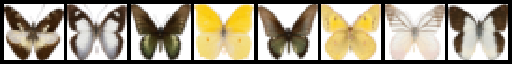

In [17]:
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

In [18]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

Noisy X shape torch.Size([8, 3, 32, 32])


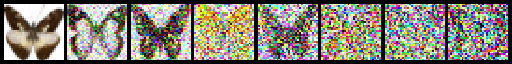

In [20]:
# ‰ªÖÊ∑ªÂä†‰∫ÜÂ∞ëÈáèÂô™Â£∞
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_start=0.001, beta_end=0.004)

timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

Noisy X shape torch.Size([8, 3, 32, 32])


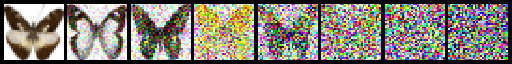

In [23]:
# 'cosine'Ë∞ÉÂ∫¶ÊñπÂºèÔºåËøôÁßçÊñπÂºèÂèØËÉΩÊõ¥ÈÄÇÂêàÂ∞∫ÂØ∏ËæÉÂ∞èÁöÑÂõæÂÉè
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')

timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

# ÂàõÂª∫Ê®°Âûã

In [25]:
from diffusers import UNet2DModel

# ÂàõÂª∫Ê®°Âûã
model = UNet2DModel(
    sample_size=image_size,   # ÁõÆÊ†áÂõæÂÉèÂàÜËæ®Áéá
    in_channels=3,            # ËæìÂÖ•ÈÄöÈÅìÊï∞ÔºåÂØπ‰∫éRGBÂõæÂÉèÊù•ËØ¥ÔºåÈÄöÈÅìÊï∞‰∏∫3 
    out_channels=3,           # ËæìÂá∫ÈÄöÈÅìÊï∞
    layers_per_block=2,       # ÊØè‰∏™UNetÂùó‰ΩøÁî®ÁöÑResNetÂ±ÇÊï∞
    block_out_channels=(64, 128, 128, 256), # Êõ¥Â§öÁöÑÈÄöÈÅì‚ÜíÊõ¥Â§öÁöÑÂèÇÊï∞
    down_block_types=(
        "DownBlock2D",        # ‰∏Ä‰∏™Â∏∏ËßÑÁöÑResNet‰∏ãÈááÊ†∑Ê®°Âùó
        "DownBlock2D",
        "AttnDownBlock2D",    # ‰∏Ä‰∏™Â∏¶ÊúâÁ©∫Èó¥Ëá™Ê≥®ÊÑèÂäõÁöÑResNet‰∏ãÈááÊ†∑Ê®°Âùó
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",      # ‰∏Ä‰∏™Â∏¶ÊúâÁ©∫Èó¥Ëá™Ê≥®ÊÑèÂäõÁöÑResNet‰∏äÈááÊ†∑Ê®°Âùó
        "UpBlock2D",
        "UpBlock2D",          # ‰∏Ä‰∏™Â∏∏ËßÑÁöÑResNet‰∏äÈááÊ†∑Ê®°Âùó
    ),
)
model.to(device)
print(type(model))

<class 'diffusers.models.unet_2d.UNet2DModel'>


In [26]:
with torch.no_grad():
    model_prediction = model(noisy_xb, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

In [27]:
# ËÆæÂÆöÂô™Â£∞Ë∞ÉÂ∫¶Âô®
noise_scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2"
)

# ËÆ≠ÁªÉÂæ™ÁéØ
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-4)

losses = []

for epoch in range(30):
    for step, batch in enumerate(train_dataloader):
        clean_images = batch["images"].to(device)
        # ‰∏∫ÂõæÁâáÊ∑ªÂä†ÈááÊ†∑Âô™Â£∞
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # ‰∏∫ÊØèÂº†ÂõæÁâáÈöèÊú∫ÈááÊ†∑‰∏Ä‰∏™Êó∂Èó¥Ê≠•
        timesteps = torch.randint(
            0, noise_scheduler.num_train_timesteps, (bs,),
            device=clean_images.device
        ).long()

        # Ê†πÊçÆÊØè‰∏™Êó∂Èó¥Ê≠•ÁöÑÂô™Â£∞ÂπÖÂ∫¶ÔºåÂêëÊ∏ÖÊô∞ÁöÑÂõæÁâá‰∏≠Ê∑ªÂä†Âô™Â£∞
        noisy_images = noise_scheduler.add_noise(clean_images,
           noise, timesteps)

        # Ëé∑ÂæóÊ®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # ËÆ°ÁÆóÊçüÂ§±, ÊØîËæÉÂô™Â£∞
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)
        losses.append(loss.item())

        # Ëø≠‰ª£Ê®°ÂûãÂèÇÊï∞
        optimizer.step()
        optimizer.zero_grad()

    if (epoch + 1) % 5 == 0:
        loss_last_epoch = sum(losses[-len(train_dataloader) :]) /len(train_dataloader)
        print(f"Epoch:{epoch+1}, loss: {loss_last_epoch}")

g:\code\ai\stable-diffusion-webui_tobe\venv\lib\site-packages\diffusers\configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch:5, loss: 0.15379350911825895
Epoch:10, loss: 0.11292902426794171
Epoch:15, loss: 0.09834889182820916
Epoch:20, loss: 0.08060872694477439
Epoch:25, loss: 0.07384288706816733
Epoch:30, loss: 0.06933391257189214


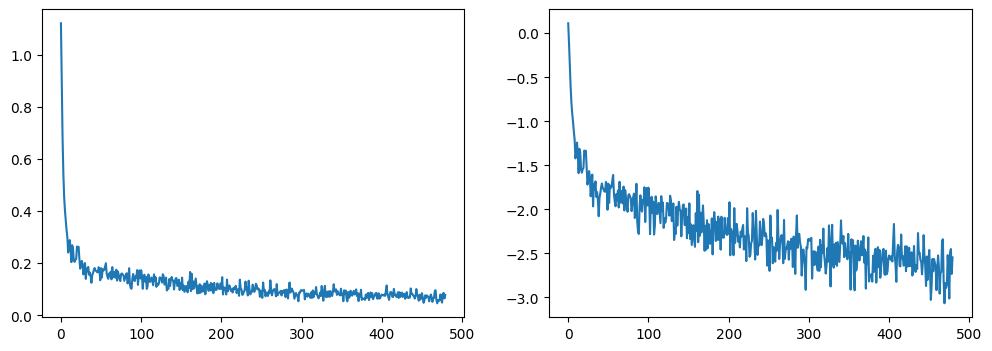

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(losses)
axs[1].plot(np.log(losses))
plt.show()

In [ ]:
# model = butterfly_pipeline.unet

# ÁîüÊàêÂõæÂÉè

  0%|          | 0/1000 [00:00<?, ?it/s]

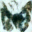

In [29]:
from diffusers import DDPMPipeline

image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler)
pipeline_output = image_pipe()
pipeline_output.images[0]

In [31]:
# ‰øùÂ≠òÊ®°Âûã
image_pipe.save_pretrained("my_pipeline")

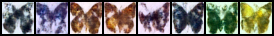

In [32]:
# Âè¶‰∏ÄÁßçÁîüÊàêÊñπÂºè, ‰∏ç‰æùËµñ pipeline

# ÈöèÊú∫ÂàùÂßãÂåñÔºà8Âº†ÈöèÊú∫ÂõæÁâáÔºâ
sample = torch.randn(8, 3, 32, 32).to(device)

for i, t in enumerate(noise_scheduler.timesteps):

    # Ëé∑ÂæóÊ®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
    with torch.no_grad():
        residual = model(sample, t).sample

    # Ê†πÊçÆÈ¢ÑÊµãÁªìÊûúÊõ¥Êñ∞ÂõæÂÉè noise_scheduler.stepÊñπÊ≥ïÂèØ‰ª•ÊâßË°åÊõ¥Êñ∞‚ÄúÊ†∑Êú¨‚ÄùÊâÄÈúÄÁöÑÊï∞Â≠¶ËøêÁÆó„ÄÇ
    sample = noise_scheduler.step(residual, t, sample).prev_sample

show_images(sample)

# ‰∏ä‰º†Ê®°Âûã

In [1]:
from huggingface_hub import get_full_repo_name

model_name = "sd-class-butterflies-32"
hub_model_id = get_full_repo_name(model_name)
hub_model_id

'tobefan/sd-class-butterflies-32'

In [3]:
from huggingface_hub import HfApi, create_repo

create_repo(hub_model_id)
api = HfApi()
api.upload_folder(
    folder_path="my_pipeline/scheduler", path_in_repo="",
    repo_id=hub_model_id
)
api.upload_folder(folder_path="my_pipeline/unet", path_in_repo="",
    repo_id=hub_model_id)
api.upload_file(
    path_or_fileobj="my_pipeline/model_index.json",
    path_in_repo="model_index.json",
    repo_id=hub_model_id,
)

diffusion_pytorch_model.safetensors:   0%|          | 0.00/74.2M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tobefan/sd-class-butterflies-32/commit/faa88d25aadaa5cf82ac86307e92de3a210568aa', commit_message='Upload model_index.json with huggingface_hub', commit_description='', oid='faa88d25aadaa5cf82ac86307e92de3a210568aa', pr_url=None, pr_revision=None, pr_num=None)

In [3]:
from huggingface_hub import ModelCard

content = f"""
---
license: mit
tags:
- pytorch
- diffusers
- unconditional-image-generation
- diffusion-models-class
---

# Model Card for Unit 1 of the [Diffusion Models Class üß®](https://github.com/huggingface/diffusion-models-class)

This model is a diffusion model for unconditional image generation of cute ü¶ã.

## Usage

```python
from diffusers import DDPMPipeline

pipeline = DDPMPipeline.from_pretrained('{hub_model_id}')
image = pipeline().images[0]
image
```
"""

card = ModelCard(content)
card.push_to_hub(hub_model_id)

CommitInfo(commit_url='https://huggingface.co/tobefan/sd-class-butterflies-32/commit/e0b0e7c6a228843e5eaa41e373b0470f97905bf5', commit_message='Upload README.md with huggingface_hub', commit_description='', oid='e0b0e7c6a228843e5eaa41e373b0470f97905bf5', pr_url=None, pr_revision=None, pr_num=None)

In [4]:
# Âä†ËΩΩÂ∑≤Áªè‰∏ä‰º†Âà∞ hub Â∫ìÈáåÁöÑÊ®°Âûã
# from diffusers import DDPMPipeline

# image_pipe = DDPMPipeline.from_pretrained(hub_model_id)
# pipeline_output = image_pipe()
# pipeline_output.images[0]